# 전복 분류 (CNN) & PreTrained Model

## 1. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("abalone.csv")
df=df.drop('id',axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.info()
# 이상치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df['Rings'].unique()
# 1살 부터 

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

#### 100개 미만 데이터를 행에서 제거

In [5]:
# 각 값의 개수를 계산
value_counts = df['Rings'].value_counts()

# 100개 이상인 값 필터링
to_keep = value_counts[value_counts >= 100].index

# 원본 DataFrame에서 해당 값을 가진 행만 남김
df = df[df['Rings'].isin(to_keep)]

In [6]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 14, 11, 12, 13,  5,  6], dtype=int64)

In [7]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64

#### 전복을 SEX가 아닌 Rings로 분류 하겠음(다중분류)

In [8]:
# label Encoder로 rings 변환(다중 클래스)
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Rings']=label_encoder.fit_transform(df['Rings'])
df

C:\Users\tbxjq\AppData\Local\Temp\ipykernel_14008\3461211492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings']=label_encoder.fit_transform(df['Rings'])


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5


In [9]:
df['Rings'].unique()
# encoded 확인

array([10,  2,  4,  5,  3,  9,  6,  7,  8,  0,  1], dtype=int64)

In [10]:
# SEX는 순서나 크기가 없는 데이터이기 때문에 원 핫 인코딩 적용
df = pd.get_dummies(df, columns = ['Sex'])

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5,True,False,False


In [11]:
df.shape

(3842, 11)

## 2. train,test 나누기

In [12]:
X=df.drop('Rings', axis=1)
Y=df['Rings']

In [13]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,True,False


In [14]:
Y.value_counts()

Rings
4     689
5     634
3     568
6     487
2     391
7     267
1     259
8     203
9     126
0     115
10    103
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2024)

In [16]:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

In [17]:
X_train_scaled.shape

(3073, 10)

## 3. CNN 정의

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential() # 각 레이어를 순차적으로 쌓는 방식의 모델 구성
# label이 rings1개이기 때문에 conv1d사용
model.add(Conv1D(32,kernel_size=3,activation='relu',input_shape=(10,1))) #input_shape을 데이터 특성에 맞추기
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 11)                1419      
                                                                 
Total params: 18,059
Trainable params: 18,059
Non-trainable params: 0
____________________________________________________

In [19]:

history = model.fit(X_train_scaled,Y_train,epochs=100,validation_data=(X_test_scaled,Y_test))

Epoch 1/100
97/97 [==============================] - 1s 7ms/step - loss: 2.0444 - accuracy: 0.2483 - val_loss: 1.8762 - val_accuracy: 0.2965
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 1.8929 - accuracy: 0.2782 - val_loss: 1.8453 - val_accuracy: 0.2861
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 1.8546 - accuracy: 0.2808 - val_loss: 1.8264 - val_accuracy: 0.2861
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 1.8300 - accuracy: 0.2867 - val_loss: 1.8110 - val_accuracy: 0.2913
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: 1.8159 - accuracy: 0.2890 - val_loss: 1.8124 - val_accuracy: 0.2705
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 1.7986 - accuracy: 0.2945 - val_loss: 1.7812 - val_accuracy: 0.2900
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 1.7765 - accuracy: 0.2991 - val_loss: 1.7836 - val_accuracy: 0.2900
Epoch 8/100
9

# Rings label이 11개라서 정확도가 낮음 -> Rings를 low,middle,high 3개의 범주로 묶고 다시 해봄

## 1. 데이터 전처리

In [20]:
import pandas as pd
import numpy as np

df_n=pd.read_csv("abalone.csv")
df_n=df_n.drop('id',axis=1)


In [21]:
# 데이터의 최대 최소 평균 값을 찾아서 데이터가 고르게 나눠질 수 있도록 범위를 조절

min=df_n['Rings'].min()
max=df_n['Rings'].max()
mean = df_n['Rings'].mean()

print(f"Min ; {min}, Max : {max}, mean : {mean}")

Min ; 1, Max : 29, mean : 9.933684462532918


**범주형 데이터를 카테고리화 하기**

In [22]:

# Rings를 카테고리로 나누기
df_n['Level'] = pd.cut(df_n['Rings'], bins=[0, 7, 12, 30], labels=['Low', 'Middle', 'High'])
df_n

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Level
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,High
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Low
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Middle
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Middle
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Low
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Middle
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Middle
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Middle
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Middle


In [23]:
df_n['Level'].value_counts()

Level
Middle    2645
Low        839
High       693
Name: count, dtype: int64

In [24]:
type(df_n)

pandas.core.frame.DataFrame

In [25]:
input = df_n.drop(['Level','Rings'],axis=1)
target = df_n['Level']

In [26]:
type(target)

pandas.core.series.Series

**LabelEncoder**

In [27]:
# 커테고리가 순서나 크기가 있는 데이터이기 때문에 labelencoder 적용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target = le.fit_transform(target)

In [28]:
print(target.shape)
print(type(target)) # sklearn의 클래스가 판다스 데이터 프레임을 자동으로 넘파이 배열로 변환

(4177,)
<class 'numpy.ndarray'>


**OneHot Encoder**

In [29]:
# SEX는 순서나 크기가 없는 데이터이기 때문에 원 핫 인코딩 적용
input = pd.get_dummies(input, columns = ['Sex'])
input

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


In [30]:
# CNN의 conv1d에 입력데이터 형태는 3차원 이어야 한다 (특성 수 1추가)
# input = input.reshape((input.shape[0], input.shape[1], 1)) reshape은 넘파이 배열에만 적용 가능
#input= np.expand_dims(input,axis=-1) # input 데이터를 3차원 만들고 train_test_split을 사영하면 오류(2차원이어야 함)
#input.shape

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split (input,target, test_size=0.2,stratify=target)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test) # 주의 fit_transform이 아닌 transform만 한다.

In [33]:
x_train_scaled=np.expand_dims(x_train_scaled,axis=-1)
x_train_scaled.shape

(3341, 10, 1)

In [34]:
x_test_scaled=np.expand_dims(x_test_scaled,axis=-1)
x_test_scaled.shape

(836, 10, 1)

## 2. CNN모델 구성

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential() # 아래 층을 순차적으로 쌓기
model.add(Conv1D(32,kernel_size=3,activation='relu',input_shape=(10,1)))#1차원 데이터 처리
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,027
Trainable params: 17,027
Non-trainable params: 0
__________________________________________________

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 정수형 라벨이기 때문에 sparse 사용
# 원 핫 인코딩된 라벨이면 그냥 categorical_crossentropy 사용


In [37]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
105/105 [==============================] - 1s 6ms/step - loss: 0.6721 - accuracy: 0.7207 - val_loss: 0.6016 - val_accuracy: 0.7333
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7522 - val_loss: 0.5736 - val_accuracy: 0.7536
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7591 - val_loss: 0.5712 - val_accuracy: 0.7512
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7743 - val_loss: 0.5699 - val_accuracy: 0.7596
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5423 - accuracy: 0.7749 - val_loss: 0.5564 - val_accuracy: 0.7644
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7773 - val_loss: 0.5464 - val_accuracy: 0.7775
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7767 - val_loss: 0.5323 - val_accuracy: 0.7763

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

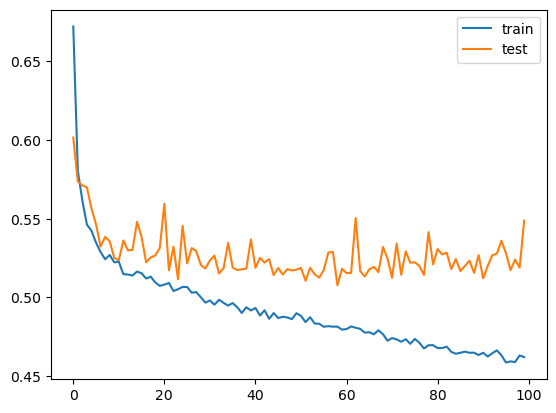

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

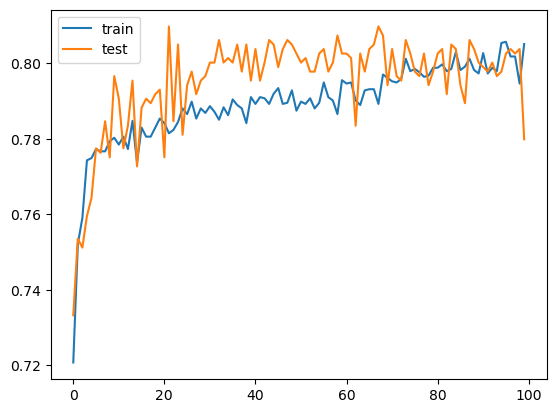

In [40]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend()

In [41]:
model.evaluate(x_test_scaled,y_test)


27/27 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7799


[0.5488104820251465, 0.779904305934906]

In [42]:
model.evaluate(x_train_scaled,y_train)

105/105 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7986


[0.46933168172836304, 0.7985633015632629]

27/27 [==============================] - 0s 2ms/step
Confusion Matrix


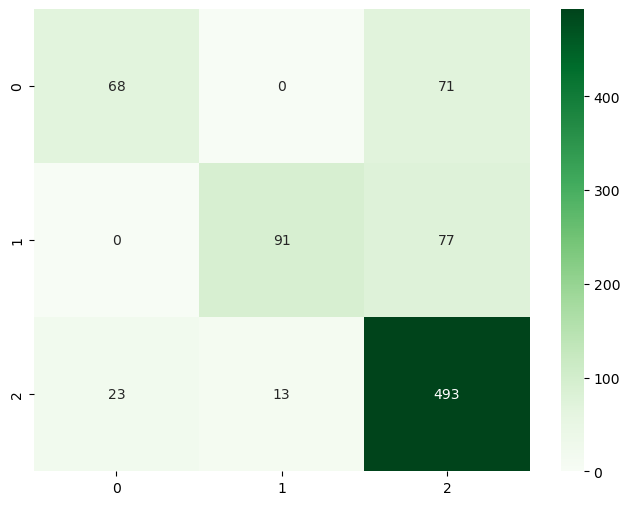

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=y_test # y_test는 1차원 이므로 np.argmax()사용 필요 없다.
Y_pred = np.argmax(model.predict(x_test_scaled),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

**정확도가 오름 -> 이 모델로 사전 학습 실시**

## 3. 모델 저장

In [79]:
import tensorflow as tf

base_loss,base_accuracy=model.evaluate(x_test_scaled, y_test)

model_file='C:\\Users\\tbxjq\\Desktop\\가천대학교\\3학년 2학기\\딥러닝 응용\\Deep_learning_class\\4주차\\abalone_cnn.h5'

tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

27/27 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7799
model saved at  C:\Users\tbxjq\Desktop\가천대학교\3학년 2학기\딥러닝 응용\Deep_learning_class\4주차\abalone_cnn.h5
Accuracy >77.990431
Base Loss >0.55


## 4. Pretrained Model로 부른 후 새로운 층과 출력층 추가

In [104]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [105]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
base_model.evaluate(x_test_scaled, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7799


[0.5488104820251465, 0.779904305934906]

In [106]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  5


In [107]:
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model

In [108]:
# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 3)

In [109]:
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [110]:
# 새로운 층으로 Conv1D 층과 Dense층 추가하고 출력층 추가

new_model.add(Conv1D(64,kernel_size=3,activation='relu'))
new_model.add(MaxPooling1D(pool_size=2))
new_model.add(Flatten())
new_model.add(Dense(64,activation='relu'))
new_model.add(Dense(3,activation='softmax'))

In [111]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)              

In [112]:
history2 = new_model.fit(x_train_scaled,y_train,epochs=50,validation_data=(x_test_scaled,y_test))

Epoch 1/50
105/105 [==============================] - 2s 7ms/step - loss: 0.6859 - accuracy: 0.7151 - val_loss: 0.5992 - val_accuracy: 0.7488
Epoch 2/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5856 - accuracy: 0.7540 - val_loss: 0.5726 - val_accuracy: 0.7596
Epoch 3/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7713 - val_loss: 0.5648 - val_accuracy: 0.7703
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7815 - val_loss: 0.5369 - val_accuracy: 0.7847
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7707 - val_loss: 0.5680 - val_accuracy: 0.7644
Epoch 6/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.7764 - val_loss: 0.5494 - val_accuracy: 0.7811
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7767 - val_loss: 0.5399 - val_accuracy: 0.7943
Epoch 

In [113]:
new_model.evaluate(x_train_scaled,y_train)

105/105 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8102


[0.4452435076236725, 0.8102364540100098]

In [114]:
new_model.evaluate(x_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8026


[0.5132885575294495, 0.8026315569877625]

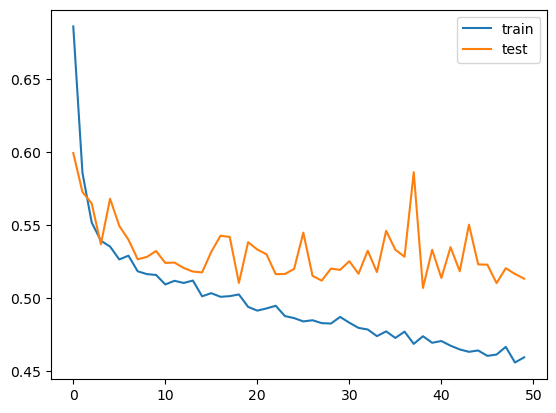

In [115]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

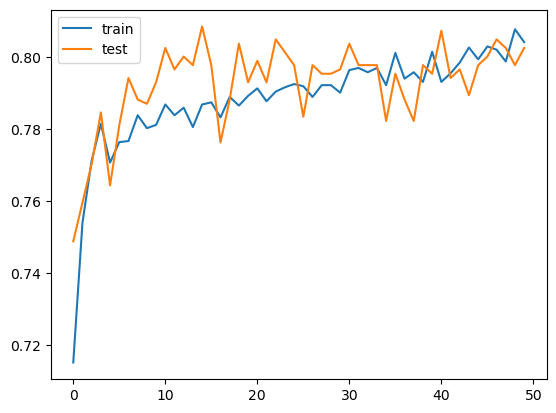

In [116]:
plt.plot(history2.history["accuracy"],label="train")
plt.plot(history2.history["val_accuracy"],label="test")
plt.legend()

## 5. Fine Tunning 

In [117]:
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_1,True
1,<keras.layers.pooling.max_pooling1d.MaxPooling...,max_pooling1d_1,True
2,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_11,True
3,<keras.layers.pooling.max_pooling1d.MaxPooling...,max_pooling1d_4,True
4,<keras.layers.reshaping.flatten.Flatten object...,flatten_4,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_8,True
6,<keras.layers.core.dense.Dense object at 0x000...,dense_9,True


In [118]:
history3 = new_model.fit(x_train_scaled,y_train,epochs=50,validation_data=(x_test_scaled,y_test),shuffle=True)

Epoch 1/50
105/105 [==============================] - 1s 6ms/step - loss: 0.4592 - accuracy: 0.8037 - val_loss: 0.5316 - val_accuracy: 0.8002
Epoch 2/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8078 - val_loss: 0.5246 - val_accuracy: 0.8014
Epoch 3/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.8063 - val_loss: 0.5153 - val_accuracy: 0.7978
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8001 - val_loss: 0.5206 - val_accuracy: 0.7955
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8066 - val_loss: 0.5145 - val_accuracy: 0.7978
Epoch 6/50
105/105 [==============================] - 1s 5ms/step - loss: 0.4516 - accuracy: 0.8063 - val_loss: 0.5197 - val_accuracy: 0.8050
Epoch 7/50
105/105 [==============================] - 1s 6ms/step - loss: 0.4492 - accuracy: 0.8075 - val_loss: 0.5377 - val_accuracy: 0.8014
Epoch 

In [119]:
new_model.evaluate(x_train_scaled,y_train)

105/105 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8357


[0.3896498382091522, 0.8356779217720032]

In [120]:
new_model.evaluate(x_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7883


[0.5426581501960754, 0.7882775068283081]

* **과대 적합-> 규제 적용**
* **Dropout,BatchNormalization 추가**

In [97]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(3341, 10, 1)
(836, 10, 1)


In [121]:
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)              

In [122]:
new_model = remove_last_layers(new_model, 5)
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [123]:
from tensorflow.keras.layers import Dropout, BatchNormalization

new_model.add(Dropout(0.5))
new_model.add(Conv1D(64,kernel_size=3,activation='relu'))
new_model.add(BatchNormalization())
new_model.add(MaxPooling1D(pool_size=2))
new_model.add(Dropout(0.5))

new_model.add(Flatten())
new_model.add(Dense(64,activation='relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
new_model.add(Dense(3,activation='softmax'))

new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 4, 32)             0         
                                                                 
 conv1d_12 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 batch_normalization (BatchN  (None, 2, 64)            256       
 ormalization)                                                   
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)          

In [124]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [125]:
history4 = new_model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test),shuffle=True)


Epoch 1/100
105/105 [==============================] - 3s 10ms/step - loss: 1.2473 - accuracy: 0.5064 - val_loss: 0.7400 - val_accuracy: 0.6938
Epoch 2/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9148 - accuracy: 0.6295 - val_loss: 0.7233 - val_accuracy: 0.6830
Epoch 3/100
105/105 [==============================] - 1s 6ms/step - loss: 0.8399 - accuracy: 0.6579 - val_loss: 0.6778 - val_accuracy: 0.7093
Epoch 4/100
105/105 [==============================] - 0s 5ms/step - loss: 0.7699 - accuracy: 0.6797 - val_loss: 0.6583 - val_accuracy: 0.7141
Epoch 5/100
105/105 [==============================] - 1s 5ms/step - loss: 0.7575 - accuracy: 0.6776 - val_loss: 0.6491 - val_accuracy: 0.7177
Epoch 6/100
105/105 [==============================] - 1s 5ms/step - loss: 0.7295 - accuracy: 0.6986 - val_loss: 0.6428 - val_accuracy: 0.7225
Epoch 7/100
105/105 [==============================] - 1s 5ms/step - loss: 0.7052 - accuracy: 0.7055 - val_loss: 0.6515 - val_accuracy: 0.711

In [126]:
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 4, 32)             0         
                                                                 
 conv1d_12 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 batch_normalization (BatchN  (None, 2, 64)            256       
 ormalization)                                                   
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)          

In [127]:
new_model.evaluate(x_train_scaled,y_train)

105/105 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7731


[0.5188549757003784, 0.7731218338012695]

In [128]:
new_model.evaluate(x_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7584


[0.5490124225616455, 0.7583732008934021]

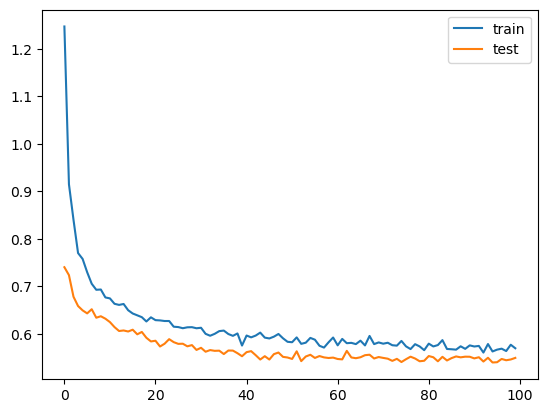

In [129]:
plt.plot(history4.history["loss"], label = "train")
plt.plot(history4.history["val_loss"], label = "test")
plt.legend()

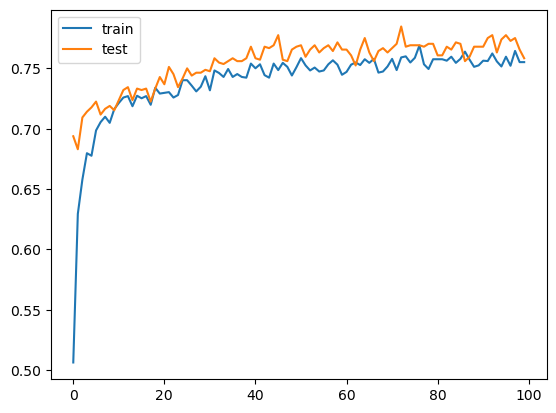

In [130]:
plt.plot(history4.history["accuracy"],label="train")
plt.plot(history4.history["val_accuracy"],label="test")
plt.legend()

1. 미세조정(드롭아웃,배치정규화)으로 과대적합은 해소되었지만 여전히 정확도가 낮음
2. 데이터의 불균형이 원인으로 보임
